In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
from matplotlib import pyplot as plt
import numpy as np
import pygtc
import emcee
import corner


In [73]:
filename = 'Multispec_snifs6.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 12
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)


(261192,)
(486272, 9)


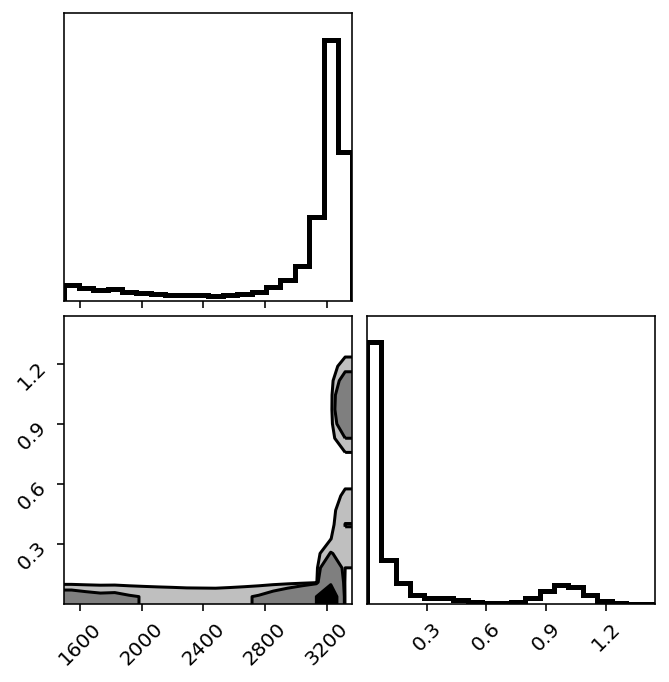

In [74]:
samples_trim1 = samples[:,1:3]
ll = np.squeeze(np.where(samples_trim1[:,0] > 3200))
print(np.shape(ll))
print(np.shape(samples))
samples_trim1[ll,1] += 0.1*np.random.randn(np.size(ll))
samples_trim1[:,1] = np.abs(samples_trim1[:,1])
ll = np.squeeze(np.where(samples_trim1[:,1] > 1))
samples[ll,1]-=1
samples_trim1[:,1] = np.abs(samples_trim1[:,1])

fig = corner.corner( 
    samples_trim1, 
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);


(480000, 3)


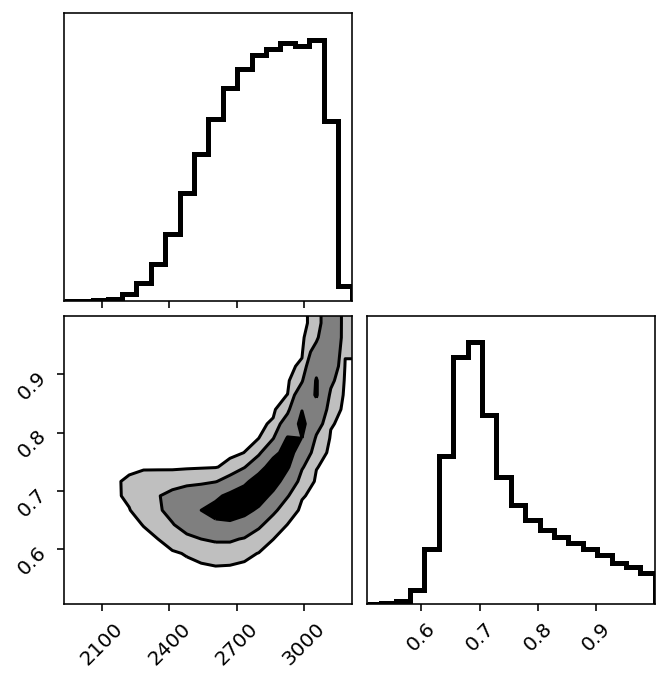

In [23]:
filename = 'Transspec2.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 1
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)

print(np.shape(samples))
samples_trim2 = samples[:,0:2]
tmp1 = np.array(samples_trim2[:,0])
tmp2 = np.array(samples_trim2[:,1])
samples_trim2[:,0] = np.array(tmp2)
samples_trim2[:,1] = np.array(tmp1)

fig = corner.corner( 
    samples_trim2, 
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);


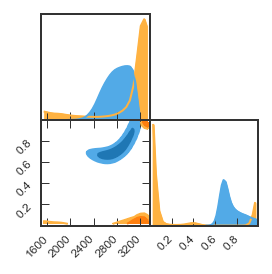

In [24]:
GTC = pygtc.plotGTC(chains=[samples_trim2,samples_trim1])


/Users/andrewmann/anaconda3/lib/python3.7/site-packages/pygtc/pygtc.py:587: RuntimeWarning: All-NaN slice encountered
  for k in range(nChains)]), axis=0)
/Users/andrewmann/anaconda3/lib/python3.7/site-packages/pygtc/pygtc.py:589: RuntimeWarning: All-NaN slice encountered
  for k in range(nChains)]), axis=0)


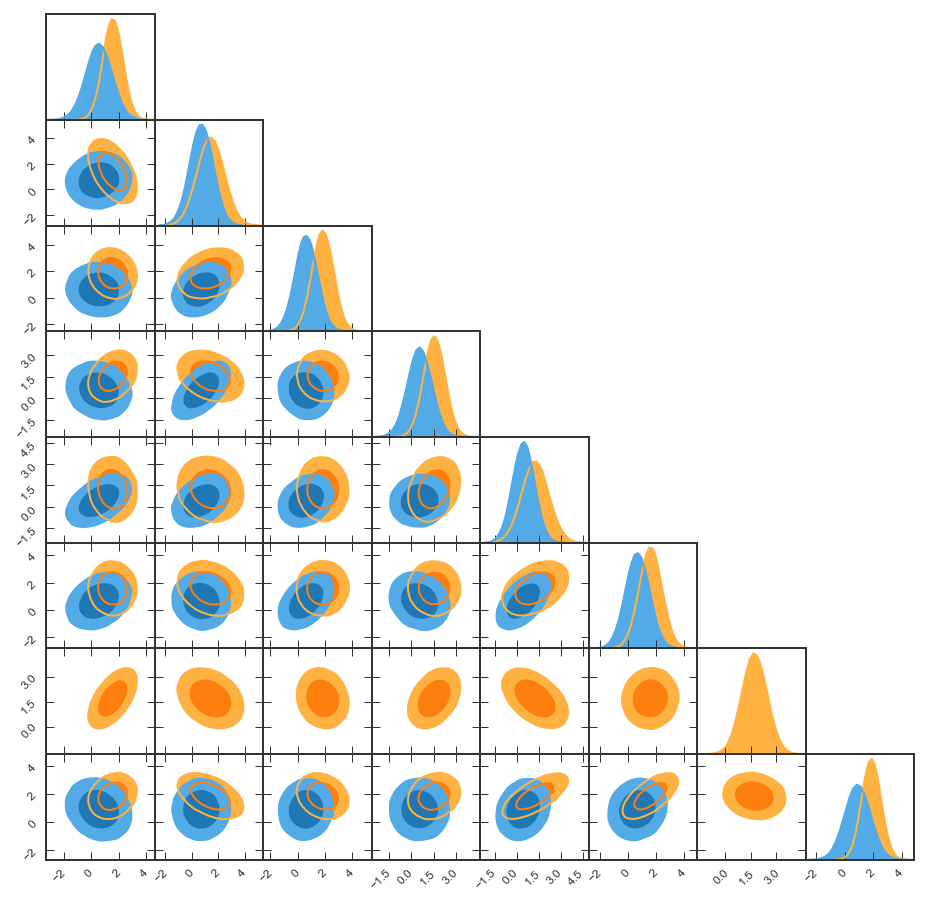

SyntaxError: invalid syntax (<ipython-input-8-9e8c9dc170e7>, line 1)